In [86]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#print(tf.__version__)

In [87]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices('GPU')

Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [97]:
#Loading data
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
train_images = x_train 
test_images  = x_test
train_labels = y_train
test_labels  = y_test 

In [98]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [99]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train= np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [104]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_50 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1568)            

In [105]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 1568)            

In [106]:
model2.fit(x_train, y_train, batch_size=64, epochs=10,)
# Evaluate the model on test set
score = model2.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])
predictions = model2.predict(x_test)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 117s 2ms/sample - loss: 0.4702 - accuracy: 0.8307
Epoch 2/10
50560/60000 [========================>.....] - ETA: 19s - loss: 0.3849 - accuracy: 0.8602

KeyboardInterrupt: 

In [66]:
len(x_test)
predictions = model2.predict(x_test)
predictions[0]
np.argmax(predictions[0])

9

In [16]:
#Visual Test
for i in range(len(x_test)):
    prediction = model2.p

AttributeError: module 'tensorflow_core.python.keras.api._v2.keras.datasets.fashion_mnist' has no attribute 'predict'

In [67]:
# plot diagnostic learning curves
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [68]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

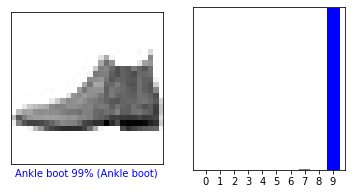

In [69]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

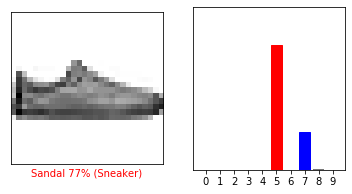

In [71]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

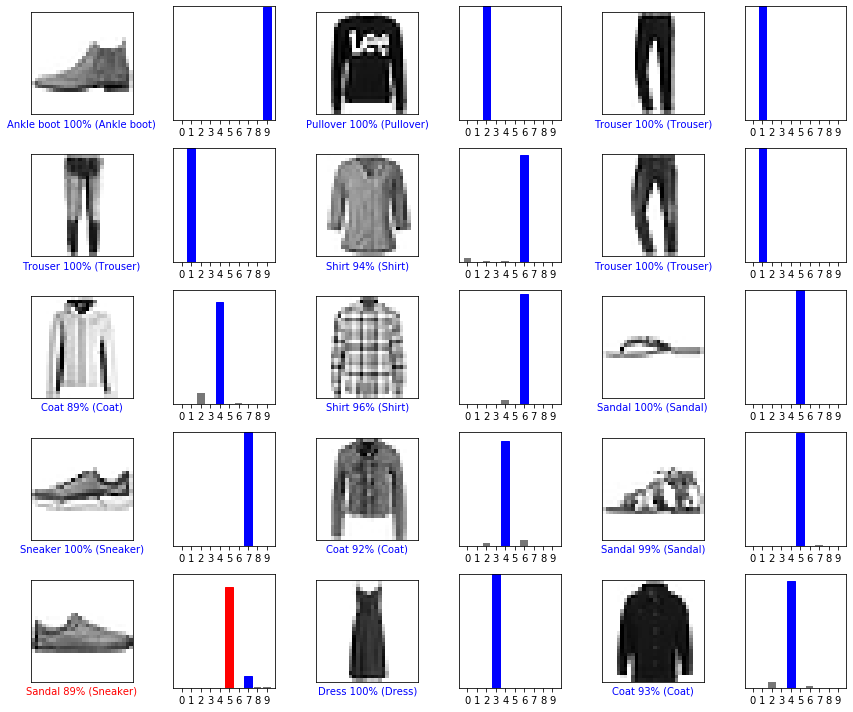

In [60]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()